presentation_of_the_test_results.ipynb

Compare all your results (all models without variable selection, and the best model with the two variable selection methods).


# Load data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('Group_20_data_cleaned.csv')
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df["Letter"] = pd.factorize(df['Letter'])[0]

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:].to_numpy(), df.Letter.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(12800, 16) (4000, 16) (3200, 16)
(12800,) (4000,) (3200,)


# Models

## Dummy classifier

In [3]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# dummy_clf.score(X_val, y_val)
print("Accuracy : {:.2f}%".format(dummy_clf.score(X_val, y_val)*100))

Accuracy : 3.38%


## linear SVM

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

linear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='linear',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

linear_svm_model.fit(X_train, y_train)

# linear_svm_model.score(X_val, y_val)
print("Accuracy : {:.2f}%".format(linear_svm_model.score(X_val, y_val)*100))

Accuracy : 84.50%


## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(criterion= 'gini',
                                    max_depth = 20 ,
                                    max_leaf_nodes= 500, 
                                    min_samples_leaf= 1, 
                                    min_samples_split = 2)

dc_model.fit(X_train,y_train)
print("Accuracy : {:.2f}%".format(dc_model.score(X_val, y_val)*100))


Accuracy : 81.97%


## Random Forest

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(max_depth=15,
                               n_estimators=20,
                               random_state=0,)

rf_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(rf_model.score(X_val, y_val)*100))

Accuracy : 93.00%


## KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10,
                             weights="distance",
                             algorithm="auto")

knn_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(knn_model.score(X_val, y_val)*100))

Accuracy : 94.38%


## Linear model (Ridge classifier)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix

linear_model = RidgeClassifier(alpha=1,
                        fit_intercept=True,
                        max_iter=3,
                        solver='auto')

linear_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(linear_model.score(X_val, y_val)*100))

Accuracy : 54.72%


## non-linear SVM

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

nonlinear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

nonlinear_svm_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(nonlinear_svm_model.score(X_val, y_val)*100))

Accuracy : 93.66%


# Results Comparison

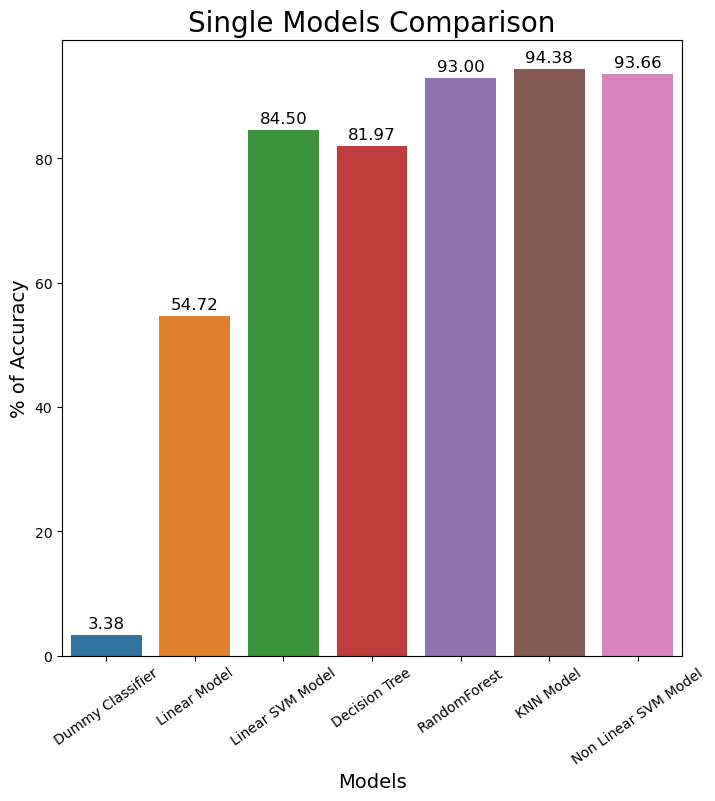

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy_results = {"Model Names" : ["Dummy Classifier",
                                      "Linear Model",
                                      "Linear SVM Model",
                                      "Decision Tree",
                                      "RandomForest",
                                      "KNN Model",
                                      "Non Linear SVM Model",],
        "Accuracy": [dummy_clf.score(X_val, y_val)*100,
                    linear_model.score(X_val, y_val)*100,
                    linear_svm_model.score(X_val, y_val)*100,
                    dc_model.score(X_val, y_val)*100,
                    rf_model.score(X_val, y_val)*100,
                    knn_model.score(X_val, y_val)*100,
                    nonlinear_svm_model.score(X_val, y_val)*100, ]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation = 35)
plt.ylabel("% of Accuracy", size=14)
plt.title("Single Models Comparison", size=20)
plt.show()


# Variable Selection

## Lasso

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [14]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )

In [15]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
search.best_params_# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.1}

In [17]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [18]:
importance = np.abs(coefficients)
importance

array([0.        , 0.78052422, 1.16699009, 0.        , 0.        ,
       1.39466378, 1.1885915 , 0.04116385, 0.06091815, 0.03006987,
       1.47392285, 0.79201976, 0.19477409, 1.12355841, 0.68355774,
       0.60195449])

In [19]:
lasso_features = list(df.columns[1:])
lasso_features = np.array(lasso_features)[importance > 0]
lasso_features

array(['y-box', 'width', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar',
       'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y_ege', 'yegvx'], dtype='<U5')

In [20]:

# X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()

lasso_X, y = df.loc[:, lasso_features], df.Letter.to_numpy()

lasso_X_train, lasso_X_test, y_train, y_test = train_test_split(lasso_X, y, test_size=0.20, random_state=42)
lasso_X_train, lasso_X_val, y_train, y_val = train_test_split(lasso_X_train, y_train, test_size=0.20, random_state=42)

### KNN with features selected by Lasso 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

lasso_knn_model = KNeighborsClassifier(n_neighbors=10,
                             weights="distance",
                             algorithm="auto")

lasso_knn_model.fit(lasso_X_train, y_train)
print("Accuracy : {:.2f}%".format(lasso_knn_model.score(lasso_X_val, y_val)*100))

Accuracy : 94.03%


### KNN with all data features

In [22]:
from sklearn.neighbors import KNeighborsClassifier

simple_knn_model = KNeighborsClassifier(n_neighbors=10,
                             weights="distance",
                             algorithm="auto")

simple_knn_model.fit(X_train, y_train)
print("Accuracy : {:.2f}%".format(simple_knn_model.score(X_val, y_val)*100))

Accuracy : 94.38%


## Bi-directional elemination

In [23]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import pandas as pd

In [25]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []

    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()

        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())

            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()

                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)

                else:
                    break 

        else:
            break

    return best_features

In [26]:
import pandas as pd

X, y = df.iloc[:,1:], df.Letter

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

bde_features = stepwise_selection(X,y)
print(bde_features)

['x2ybr', 'xy2br', 'x-bar', 'xegvy', 'y-bar', 'y_ege', 'yegvx', 'width', 'y-box', 'x-ege', 'y2bar', 'onpix', 'high', 'x2bar']


In [28]:
len(bde_features)

14

In [29]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,1:].to_numpy(), df.Letter.to_numpy()
bde_X, y = df.loc[:, bde_features].to_numpy(), df.Letter.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

bde_X_train, bde_X_test, y_train, y_test = train_test_split(bde_X, y, test_size=0.20, random_state=42)
bde_X_train, bde_X_val, y_train, y_val = train_test_split(bde_X_train, y_train, test_size=0.20, random_state=42)

### KNN with features selected by Bi-directional elemination

In [30]:
from sklearn.neighbors import KNeighborsClassifier

bde_knn_model = KNeighborsClassifier(n_neighbors=10,
                             weights="distance",
                             algorithm="auto")

bde_knn_model.fit(bde_X_train, y_train)
print("Accuracy : {:.2f}%".format(bde_knn_model.score(bde_X_val, y_val)*100))

Accuracy : 93.47%


# Results Comparison

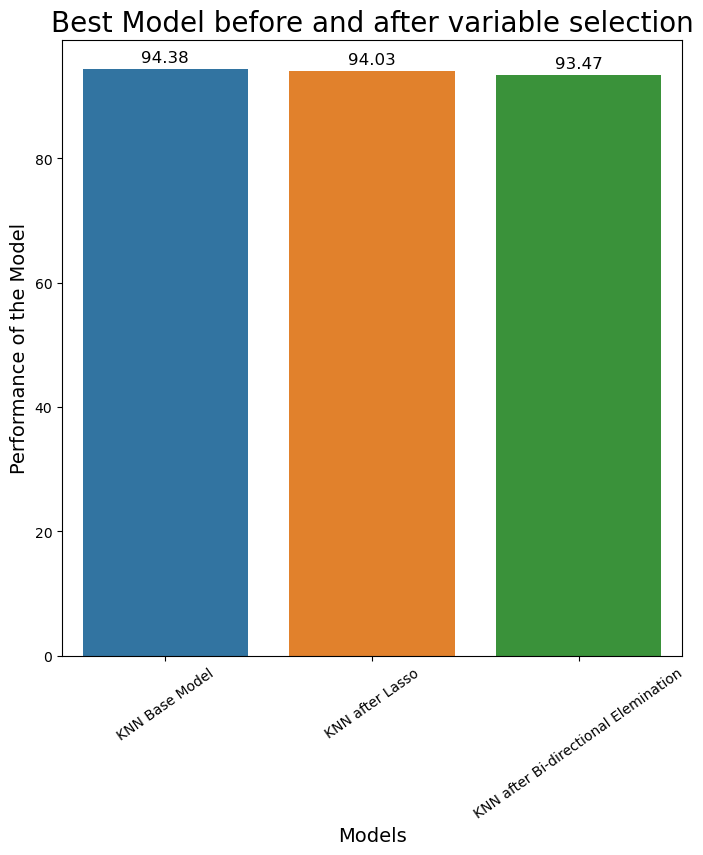

In [31]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Creating our own dataframe
accuracy_results = {"Model Names" : ["KNN Base Model",
                                      "KNN after Lasso",
                                      "KNN after Bi-directional Elemination",],
        "Accuracy": [simple_knn_model.score(X_val, y_val)*100,
                    lasso_knn_model.score(lasso_X_val, y_val)*100,
                    bde_knn_model.score(bde_X_val, y_val)*100,]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')


plt.title("Best Model before and after variable selection", size=20)
plt.xlabel("Models", size=14, )
plt.xticks(rotation = 35) 
plt.ylabel("Performance of the Model", size=14)


plt.show()


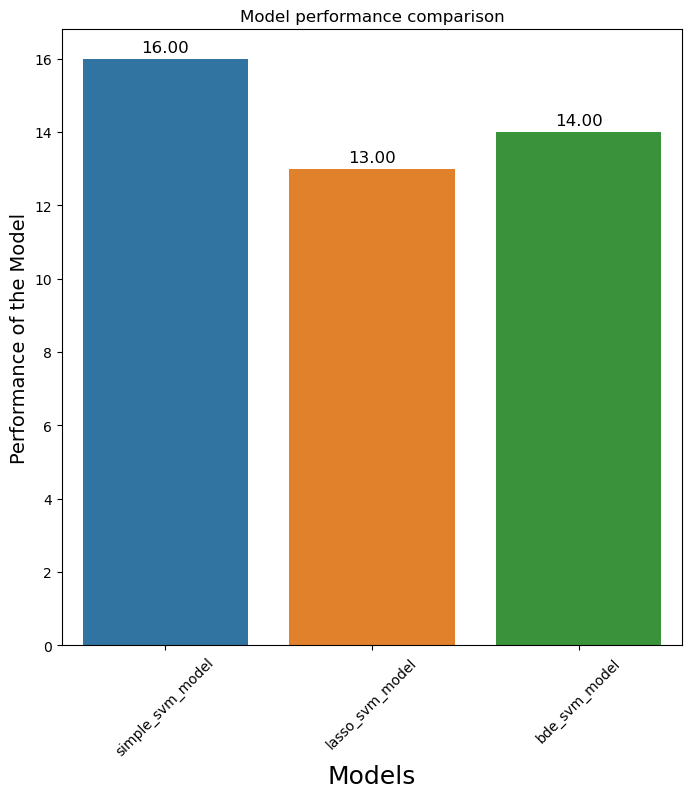

In [32]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Creating our own dataframe
accuracy_results = {"Model Names" : ["simple_svm_model",
                                      "lasso_svm_model",
                                      "bde_svm_model",],
                    "No of Features": [X_val.shape[1],
                                        lasso_X_val.shape[1],
                                        bde_X_val.shape[1] ]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'No of Features'])

plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Model Names", y="No of Features", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=18, )
plt.xticks(rotation = 45)
 
plt.ylabel("Performance of the Model", size=14)

plt.title("Model performance comparison")

plt.show()
